## 실제 데이터로 만들어보는 모델

### 1. 데이터 파악하기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split

import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 집 값 데이터 불러오기
df = pd.read_csv("./data/house_train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
# 데이터가 어떤 유형으로 이루어져 있는지 확인
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

### 2. 결측치, 카테고리 변수 처리하기

In [ ]:
# 속성별로 결측치가 몇 개인지 확인
df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [ ]:
# 카테고리형 변수를 0과 1로 이루어진 변수로 바꾸기
# pd.get_dummies() -> 정수, 실수형은 그대로
df = pd.get_dummies(df)

In [ ]:
# 결측치를 전체 컬럼의 평균으로 대체
df = df.fillna(df.mean())

In [ ]:
# 업데이트된 데이터 프레임을 출력
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


### 3. 속성별 관련도 추출하기

In [ ]:
# 데이터 사이의 상관관계 저장
df_corr = df.corr()

# 집값과 관련이 큰 순서대로 저장
df_corr_sort = df_corr.sort_values('SalePrice', ascending=False)

# 집값과 관련도가 높은 10개의 속성들을 출력
df_corr_sort['SalePrice'].head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
BsmtQual_Ex     0.553105
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64

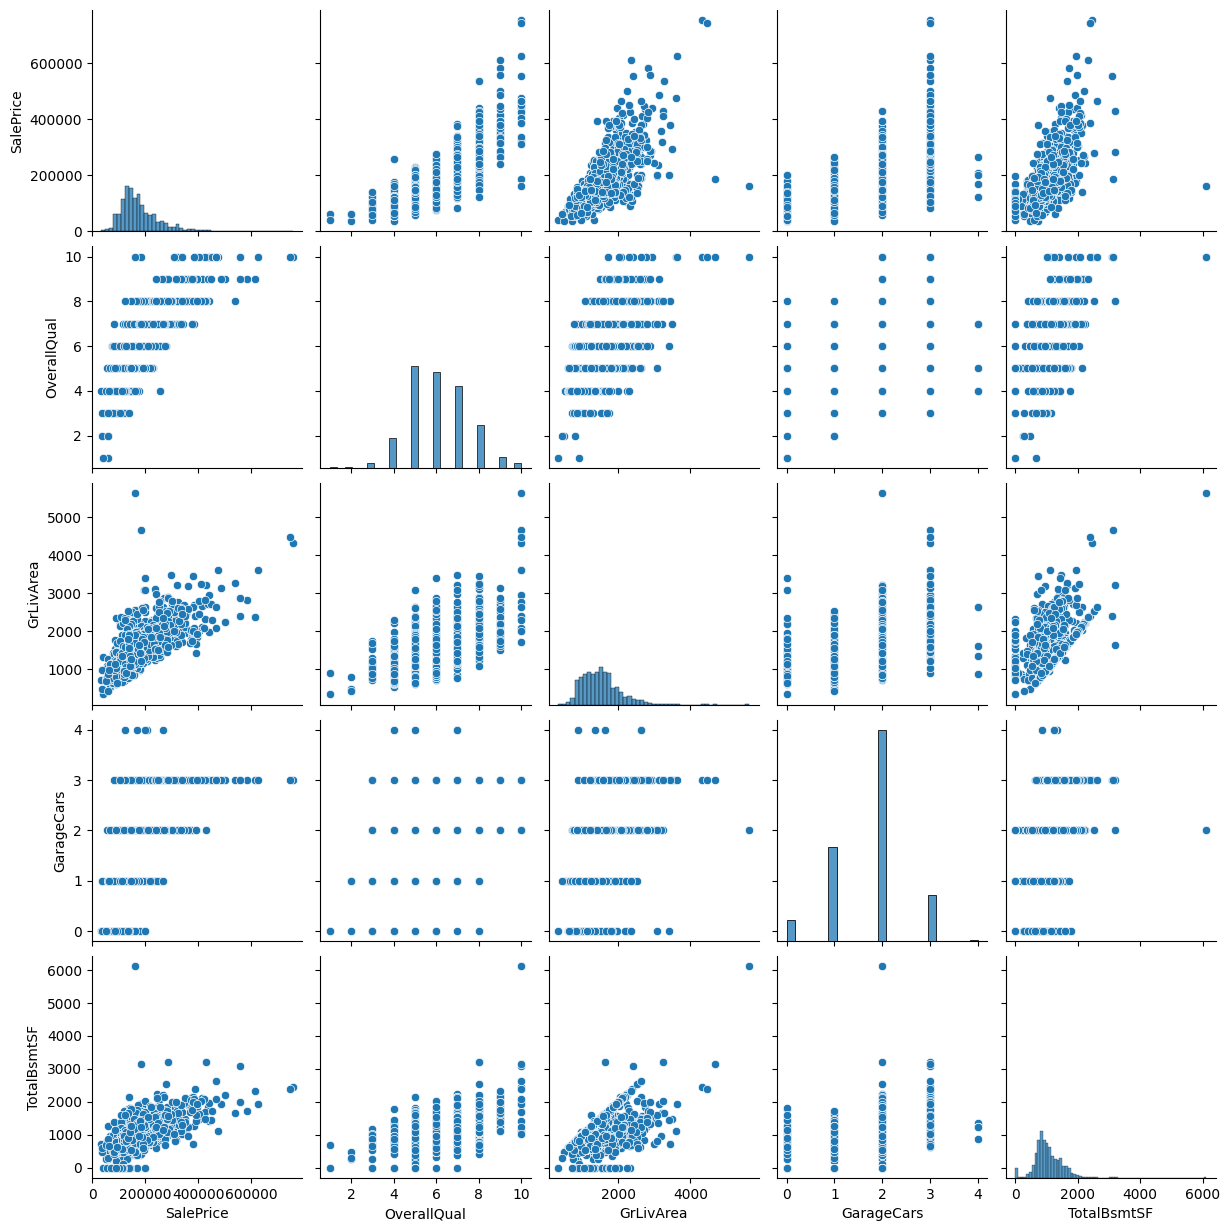

In [ ]:
# 집 값과 관련도가 높은 속성들을 추출해서 상관도 그래프 그리기
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars' , 'TotalBsmtSF']
sns.pairplot(df[cols])
plt.show()

### 4. 주택 가격 예측 모델

In [23]:
# 집값을 제외한 나머지 열을 저장
cols_train = ['OverallQual', 'GrLivArea', 'GarageCars' , 'TotalBsmtSF']
X_train_pre = df[cols_train]

# 집갑 저장
y = df['SalePrice'].values

# 전체의 80%를 학습셋으로, 20%를 테스트셋으로 지정
X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size=0.2)

# 모델의 구조 설정
model = Sequential()
model.add(Dense(30, input_dim=4, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                150       
                                                                 
 dense_4 (Dense)             (None, 40)                1240      
                                                                 
 dense_5 (Dense)             (None, 1)                 41        
                                                                 
Total params: 1,431
Trainable params: 1,431
Non-trainable params: 0
_________________________________________________________________


In [24]:
# 모델 실행
model.compile(optimizer='adam', loss='mean_squared_error')

# 20회 이상 결과가 향상되지 않으면 자동으로 중단하게 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

# 모델의 저장 경로, 이름 설정
modelpath = "./data/model/house.hdf5"

# 최적화 모델을 업데이트하고 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0,
                               save_best_only=True)

# 모델 실행
history = model.fit(X_train, y_train, validation_split=0.25, epochs=2000,
                    callbacks=[early_stopping_callback, checkpointer])



Epoch 1/2000
28/28 [==============================] - 1s 12ms/step - loss: 39447523328.0000 - val_loss: 40271253504.0000
Epoch 2/2000
28/28 [==============================] - 0s 6ms/step - loss: 39110115328.0000 - val_loss: 39874768896.0000
Epoch 3/2000
28/28 [==============================] - 0s 5ms/step - loss: 38596997120.0000 - val_loss: 39183507456.0000
Epoch 4/2000
28/28 [==============================] - 0s 6ms/step - loss: 37704876032.0000 - val_loss: 37987975168.0000
Epoch 5/2000
28/28 [==============================] - 0s 7ms/step - loss: 36200484864.0000 - val_loss: 36064665600.0000
Epoch 6/2000
28/28 [==============================] - 0s 7ms/step - loss: 33859864576.0000 - val_loss: 33055485952.0000
Epoch 7/2000
28/28 [==============================] - 0s 5ms/step - loss: 30405232640.0000 - val_loss: 28915109888.0000
Epoch 8/2000
28/28 [==============================] - 0s 5ms/step - loss: 25811068928.0000 - val_loss: 23683203072.0000
Epoch 9/2000
28/28 [===================

In [25]:
# 예측값과 실제 값, 실행 번호가 들어갈 빈 리스트 생성
real_prices = []
pred_prices = []
X_num = []

# 25개의 샘플을 뽑아 실제 값, 예측값 출력
n_iter = 0
Y_prediction = model.predict(X_test).flatten() # 예측값들

for i in range(25):
  real = y_test[i] # 실제값
  prediction = Y_prediction[i] # 예측값
  print("실제가격: {:.2f}, 예상가격: {:.2f}".format(real, prediction))
  real_prices.append(real)
  pred_prices.append(prediction)
  n_iter += 1
  X_num.append(n_iter)




10/10 [==============================] - 0s 3ms/step
실제가격: 185000.00, 예상가격: 200114.33
실제가격: 133000.00, 예상가격: 144368.92
실제가격: 98600.00, 예상가격: 171411.11
실제가격: 234000.00, 예상가격: 204436.59
실제가격: 199900.00, 예상가격: 172432.52
실제가격: 115000.00, 예상가격: 109681.04
실제가격: 114500.00, 예상가격: 140402.59
실제가격: 109900.00, 예상가격: 165925.25
실제가격: 177500.00, 예상가격: 166132.58
실제가격: 163990.00, 예상가격: 155637.30
실제가격: 126500.00, 예상가격: 147917.33
실제가격: 37900.00, 예상가격: 110672.03
실제가격: 170000.00, 예상가격: 180203.55
실제가격: 118500.00, 예상가격: 113415.07
실제가격: 162000.00, 예상가격: 167223.06
실제가격: 187100.00, 예상가격: 197468.27
실제가격: 155000.00, 예상가격: 176016.42
실제가격: 153575.00, 예상가격: 149164.52
실제가격: 112000.00, 예상가격: 158173.58
실제가격: 165400.00, 예상가격: 171770.20
실제가격: 130000.00, 예상가격: 189900.30
실제가격: 100000.00, 예상가격: 123915.51
실제가격: 134000.00, 예상가격: 151488.98
실제가격: 147000.00, 예상가격: 249184.14
실제가격: 625000.00, 예상가격: 394368.38


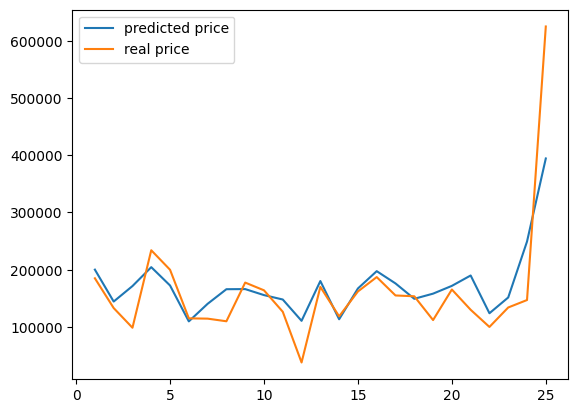

In [28]:
# 그래프를 통해 샘플로 뽑은 25개의 값 비교
plt.plot(X_num, pred_prices, label='predicted price')
plt.plot(X_num, real_prices, label='real price')
plt.legend()
plt.show()

In [32]:
X_test

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF
997,6,1442,2,1442
1081,5,1040,1,1040
91,5,1235,2,1235
559,7,1557,2,1374
977,7,1241,2,1241
...,...,...,...,...
449,3,1183,1,649
864,7,1372,2,1372
859,6,2654,2,1054
235,6,987,1,483
